In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("covid_19_clean_complete.csv")
dfcopy = df.copy()

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11622 non-null  object 
 1   Country/Region  38889 non-null  object 
 2   Lat             38889 non-null  float64
 3   Long            38889 non-null  float64
 4   Date            38889 non-null  object 
 5   Confirmed       38889 non-null  int64  
 6   Deaths          38889 non-null  int64  
 7   Recovered       38889 non-null  int64  
 8   Active          38889 non-null  int64  
 9   WHO Region      38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [7]:
print(df.columns) #kolon bilgileri
df.describe().T #sayisal veri ort vb

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Lat,38889.0,21.362269,24.969887,-51.7963,7.5400,23.6850,41.2044,7.170690e+01
Long,38889.0,23.701848,70.158193,-135.0000,-15.3101,21.7587,81.0000,1.780650e+02
Confirmed,38889.0,9020.539613,71003.079205,0.0000,0.0000,77.0000,884.0000,2.191052e+06
Deaths,38889.0,560.147754,4543.654747,0.0000,0.0000,1.0000,12.0000,1.184340e+05
Recovered,38889.0,3402.299082,22340.891460,0.0000,0.0000,9.0000,294.0000,5.991150e+05
Active,38889.0,5058.092777,48628.188388,-14.0000,0.0000,12.0000,317.0000,1.473503e+06


In [8]:
df.isnull().sum() #hangi kolonda kaç boş var

Province/State    27267
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
df["Province/State"].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

In [10]:
df = df.fillna("0000")

In [11]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38884,0000,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,0000,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,0000,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,0000,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe
38888,0000,Lesotho,-29.609988,28.233608,2020-06-18,4,0,2,2,Africa


In [12]:
sayilabilenListe=["Lat","Long","Confirmed","Deaths","Recovered","Active"]
sayilamayanListe=["Province/State","Country/Region","WHO Region","Date"]
df = pd.get_dummies(df,sayilamayanListe)
df.head()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Province/State_0000,Province/State_Alberta,Province/State_Anguilla,Province/State_Anhui,...,WHO Region_2020-06-15,WHO Region_2020-06-16,WHO Region_2020-06-17,WHO Region_2020-06-18,Date_Africa,Date_Americas,Date_Eastern Mediterranean,Date_Europe,Date_South-East Asia,Date_Western Pacific
0,33.0000,65.0000,0,0,0,0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,41.1533,20.1683,0,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28.0339,1.6596,0,0,0,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,42.5063,1.5218,0,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-11.2027,17.8739,0,0,0,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [13]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1:].values
x

,Long,Confirmed,Deaths,Recovered,Active,Province/State_0000,Province/State_Alberta,Province/State_Anguilla,Province/State_Anhui,Province/State_Aruba,...,WHO Region_2020-06-14,WHO Region_2020-06-15,WHO Region_2020-06-16,WHO Region_2020-06-17,WHO Region_2020-06-18,Date_Africa,Date_Americas,Date_Eastern Mediterranean,Date_Europe,Date_South-East Asia
0,65.000000,0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,20.168300,0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1.659600,0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1.521800,0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,17.873900,0,0,0,0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38884,6.613081,688,12,191,485,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
38885,48.516388,909,248,273,388,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
38886,43.333300,210,5,129,76,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
38887,71.276093,5279,51,3762,1466,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [14]:
y


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [16]:
#test train bölmesi
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)
#gnb nesnesi
gnb = GaussianNB()

#makinayı eğitme kısmı
gnb.fit(x_train, y_train.ravel())

GaussianNB()

In [17]:
# Tahmin kısmı
result = gnb.predict(x_test)

In [18]:
# Matris oranı
cm = confusion_matrix(y_test,result)
print(cm)

[[8463 1657]
 [  54 2660]]


In [19]:
# Doğruluk oranı
accuracy = accuracy_score(y_test, result)
print(accuracy)

0.8666822502727131


<BarContainer object of 38889 artists>

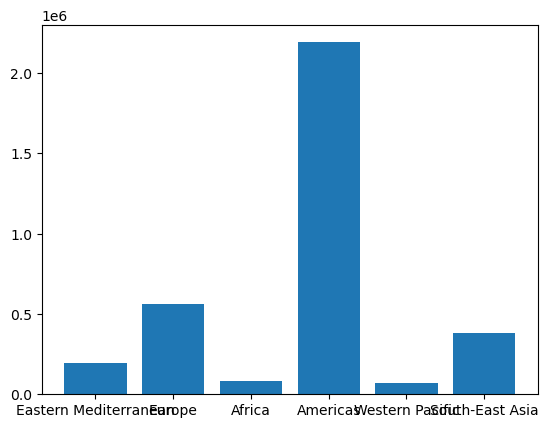

In [21]:
import matplotlib.pyplot as plt
df11 = pd.read_csv("covid_19_clean_complete.csv")
# WHO Region lara göre kıyaslama grafiği
plt.bar(df11['WHO Region'],df11['Confirmed']) 
#ilk veri x doğrusunda ikinci veri y doğrsusunda olucak